# Simulated leakage of a single bit

A very simple example simulating the leakage of a single bit in the Gaussian
model, and then fitting the line onto it using ordinary least squares (OLS).

Part of the leakage modeling tutorial, license is GPLv3, see https://www.gnu.org/licenses/gpl-3.0.en.html<br>
Requires traces and data from [pysca toolbox](https://github.com/ikizhvatov/pysca)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Create simulated data (half for 0, half for 1)

In [2]:
numSamples = 50 * 2

mu0, sigma0 = 10, 2 # mean (signal) and standard deviation (noise) for 0
mu1, sigma1 = 20, 4 # mean (signal) and standard deviation (noise) for 1
samples0 = np.random.normal(mu0, sigma0, int(numSamples/2))
samples1 = np.random.normal(mu1, sigma1, int(numSamples/2))

x = np.concatenate((np.zeros(len(samples0)), np.ones(len(samples1)))) # intermediate variables
y = np.concatenate((samples0, samples1)) # simulated leakages

Create the matrix (left-hand side of the over-determined system) necessary for the numpy least squares routine. Note the column of ones for the constant term.

In [3]:
columnOfOnes = np.concatenate((np.ones(len(samples0)), np.ones(len(samples1))))
A = np.vstack((x, columnOfOnes))

Perform linear regression, i.e. solve the system using OLS, and print out the coefficients $\beta$

In [4]:
beta = np.linalg.lstsq(A.T,y)[0]
print(beta[0], beta[1])

10.0784811227 10.1435158104


Visualize initial data (as dots) and the fitted line

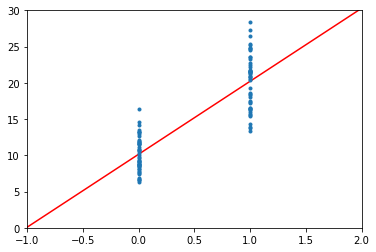

In [5]:
xnew = np.arange(-1,3) # range somewhat wider to ensure 0 and 1 are not on the edges of the plot
line = beta[0] * xnew + beta[1] # fitted line
plt.plot(xnew, line, 'r-', x, y, '.')
plt.xlim((-1, 2))
plt.ylim((0, 30))
plt.show()